In [1]:
import os
import gzip
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mtrain = pickle.load(gzip.open('mlocaltrain.pkl', 'rb'))

In [3]:
mtrain.shape

(100, 363, 28)

In [19]:
figsize=(8,6)
aspect=(figsize[1]/mtrain.shape[2])/(figsize[0]/mtrain.shape[1])

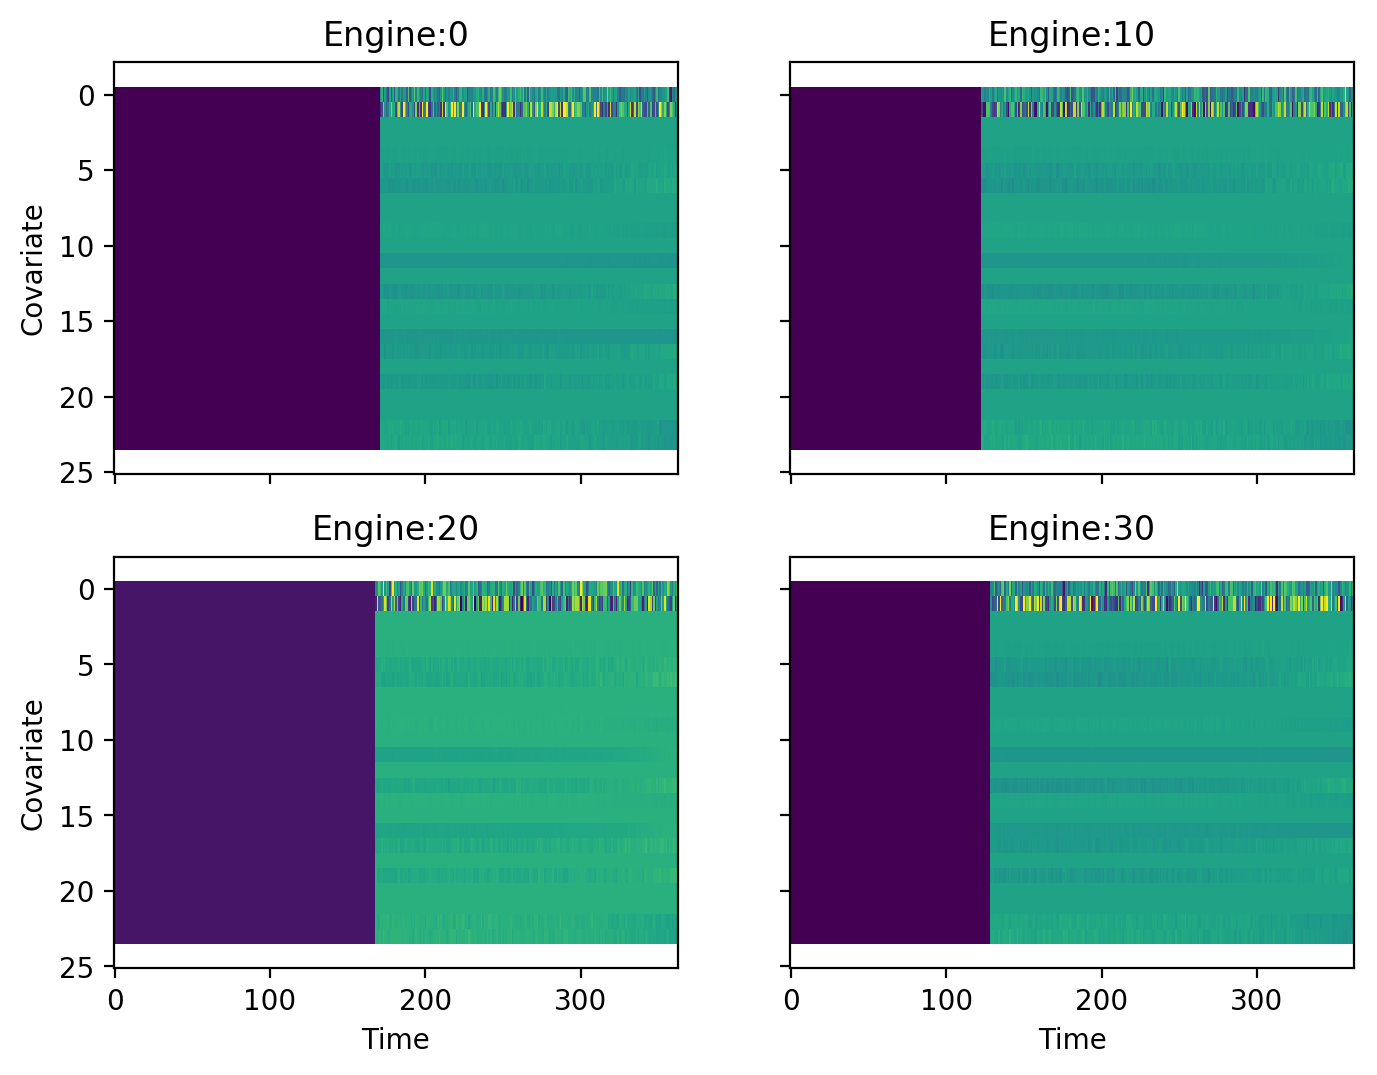

In [20]:
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=figsize, dpi=200)

engdex=0
ax[0,0].imshow(np.transpose(mtrain[engdex,:,4:]), aspect=aspect)
#ax[0,0].set_xlabel('Time')
ax[0,0].set_ylabel('Covariate')
ax[0,0].set_title('Engine:' + str(engdex))

engdex=10
ax[0,1].imshow(np.transpose(mtrain[engdex,:,4:]), aspect=aspect)
#ax[0,1].set_xlabel('Time')
#ax[0,1].set_ylabel('Covariate')
ax[0,1].set_title('Engine:' + str(engdex))

engdex=20
ax[1,0].imshow(np.transpose(mtrain[engdex,:,4:]), aspect=aspect)
ax[1,0].set_xlabel('Time')
ax[1,0].set_ylabel('Covariate')
ax[1,0].set_title('Engine:' + str(engdex))

engdex=30
ax[1,1].imshow(np.transpose(mtrain[engdex,:,4:]), aspect=aspect)
ax[1,1].set_xlabel('Time')
#ax[1,1].set_ylabel('Covariate')
ax[1,1].set_title('Engine:' + str(engdex))

plt.show()

In [21]:
def lossfn(d):
    dleq0 = d < 0
    dgeq0 = d > 0
    out = (np.exp(-1.*d/13) - 1) * dleq0
    out += (np.exp(d/10) - 1) * dgeq0
    return out

In [22]:
d = np.arange(-10, 10, step=.1)
lossval = lossfn(d)

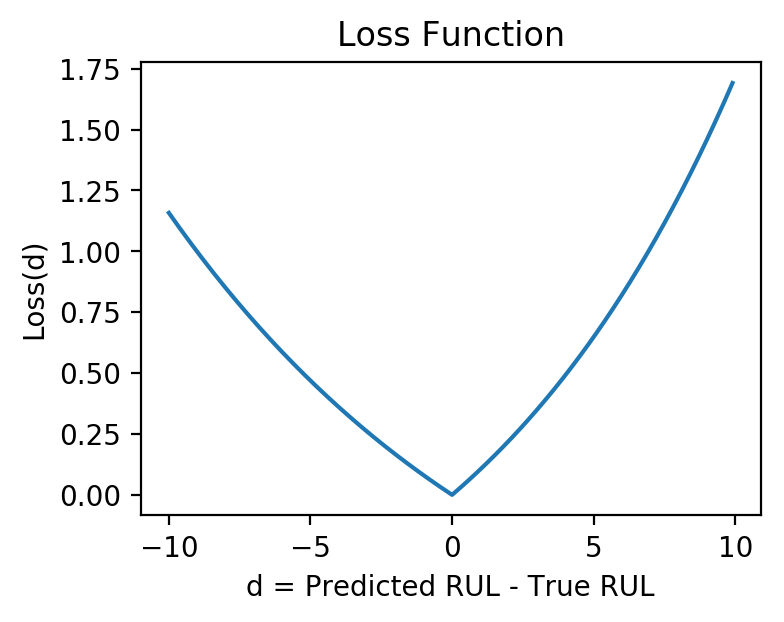

In [29]:
plt.figure(figsize=(figsize[0]/2, figsize[1]/2), dpi=200)
plt.plot(d, lossval)
plt.xlabel('d = Predicted RUL - True RUL')
plt.ylabel('Loss(d)')
plt.title('Loss Function')
plt.show()